<h1 style="color:navy">Анализ просмотров карточек статей пользователями</h1>

<h3 style ="color:navy">Описание проекта</h3>

Менеджерам компании еженедельно требуется проводить анализ пользовательского взаимодействия с карточками статей и отвечать на стандартные вопросы о взаимодействии пользователей с карточками статей.

С помощью дата-инженеров компании требуется автоматизировать выгрузку нужных данных, по которым будет создаваться дашборд с актуальными данными.

<h3 style ="color:navy">Техническое задание</h3>

1. *Бизнес-задача:* анализ действий пользователей с карточками Яндекс.Дзен.
1. *Частота использования дашборда:* не реже, чем раз в неделю.
1. *Основные пользователи:* менеджеры по анализу контента.
1. *Состав данных*: 
    - Каждую карточку определяют её тема и источник (у него тоже есть тема);
    - Примеры тем: **«Красота и здоровье»**, **«Россия»**, **«Путешествия»**;
    - Возрастная категория пользователей: например **«26-30»** или **«45+»**;
    - Тип действий пользователей:
        - Карточка отображена для пользователя (`show`);
        - Пользователь кликнул на карточку (`click`);
        - Пользователь просмотрел статью карточки (`view`).
        
        
5. *Параметры, по которым группируются данные:*
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа.
    
    
6. *Характер данных:*
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины.
    
    
7. *Важность:* все графики имеют равную важность.
1. *Источники данных:* агрегирующая таблица `dash_visits` из базы данных `zen`:
    - `record_id` — первичный ключ,
    - `item_topic` — тема карточки,
    - `source_topic` — тема источника,
    - `age_segment` — возрастной сегмент,
    - `dt` — дата и время,
    - `visits` — количество событий.
    
    
9. *Частота обновления данных:* один раз в сутки, в полночь по UTC.
1. *Макет дашборда:*
<div>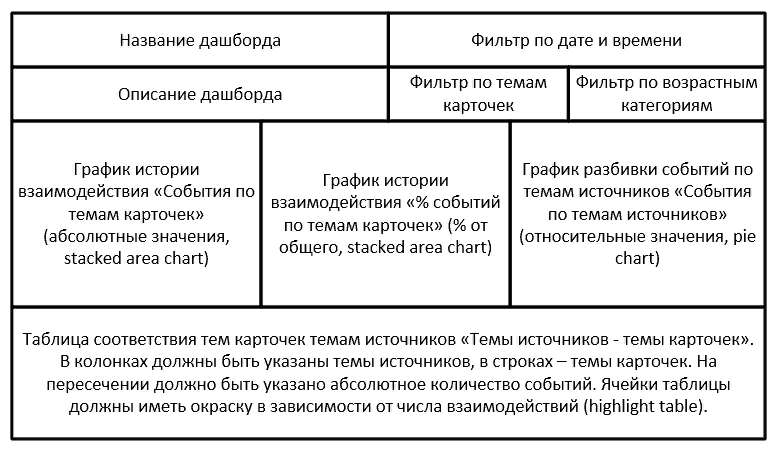
</div>    

<h3 style ="color:navy">Чтение и загрузка данных</h3>

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# параметры подключения к БД
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
# подключение к БД
engine = create_engine(connection_string)

# запрос 
query = 'select * from dash_visits'
dash_visits = pd.io.sql.read_sql(query, con = engine)

# выгрузка результатов запроса в csv-файл
dash_visits.to_csv('dash_visits.csv', index=False)

Данные проверены дата-инженерами, пропусков, дубликатов в таблице dash_visits не содержится. Типы данных соответствуют содержимому:

In [4]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


<h3 style ="color:navy">Создание дашборда и презентации</h3>

На основе выгруженного csv-файла в `Tableau` был создан <a href="https://public.tableau.com/views/dash_visits_16780291869280/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link">дашборд</a>, с помощью которого были получены ответы на поставленные вопросы:
- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?

С выводами и графиками дашборда можно ознакомится в <a href="https://github.com/TanikaBoTanika/StudyProjects/blob/e5c216b3f509d57b3ed0b3a4a6bbab0d89481c25/Dzen_presentation.pdf">презентации</a>. 